# Import Modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Import Data

In [3]:
df = pd.read_csv("preprocessed_all.csv")
# df_test = pd.read_csv("test_preprocessed.csv")
df.shape
df_test = df.iloc[10500:,:]
df = df.iloc[:10500,:]
df_test.shape

(4500, 72)

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'primary_identifier', 'gender',
       'network_stay', 'average_monthly_bill_amount', 'dusage_sum',
       'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_days',
       'dusage_stddev', 'vusage_onnet_sum', 'vusage_onnet_max',
       'vusage_onnet_min', 'vusage_onnet_days', 'vusage_onnet_avg',
       'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
       'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_avg',
       'vusage_offnet_stddev', 'number_of_fixed_bb_accounts',
       'number_of_iptv_accounts', 'add_on_tot_rental', 'add_on_count',
       'next_month_plan', 'device_type_2G', 'device_type_3G', 'device_type_4G',
       'device_category_Basic', 'device_category_Feature phone',
       'device_category_M2M', 'device_category_Modem',
       'device_category_Pluggable card', 'device_category_Smartphone',
       'device_category_Tablet', 'district_name_Ampara',
       'district_name_Anuradhapura', 'district_name_Badulla',
 

In [5]:
df.isna().sum()

Unnamed: 0            0
Unnamed: 0.1          0
primary_identifier    0
gender                0
network_stay          0
                     ..
age_group_40-50       0
age_group_50-60       0
age_group_60-70       0
age_group_<20         0
age_group_>70         0
Length: 72, dtype: int64

In [6]:
df_test.shape

(4500, 72)

In [7]:
df.shape

(10500, 72)

## Seaborn Plot

<AxesSubplot:xlabel='next_month_plan', ylabel='count'>

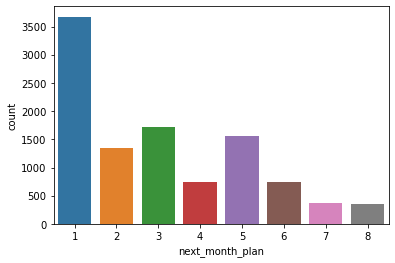

In [8]:
sns.countplot(x = 'next_month_plan', data=df)

In [9]:
# sns.countplot(x = 'next_month_plan', data=df_test)

## Encode Output Class

In [10]:
class2idx = {
    1:0,
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    7:6,
    8:7
}

idx2class = {v: k for k, v in class2idx.items()}

df['next_month_plan'].replace(class2idx, inplace=True)

# Drop Unnecessary Data

In [11]:
y = df.next_month_plan
# ids = df_test.primary_identifier

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'primary_identifier', 'gender',
       'network_stay', 'average_monthly_bill_amount', 'dusage_sum',
       'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_days',
       'dusage_stddev', 'vusage_onnet_sum', 'vusage_onnet_max',
       'vusage_onnet_min', 'vusage_onnet_days', 'vusage_onnet_avg',
       'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
       'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_avg',
       'vusage_offnet_stddev', 'number_of_fixed_bb_accounts',
       'number_of_iptv_accounts', 'add_on_tot_rental', 'add_on_count',
       'next_month_plan', 'device_type_2G', 'device_type_3G', 'device_type_4G',
       'device_category_Basic', 'device_category_Feature phone',
       'device_category_M2M', 'device_category_Modem',
       'device_category_Pluggable card', 'device_category_Smartphone',
       'device_category_Tablet', 'district_name_Ampara',
       'district_name_Anuradhapura', 'district_name_Badulla',
 

In [13]:
ids = df_test['primary_identifier']
df_test = df_test.drop(['Unnamed: 0','Unnamed: 0.1','primary_identifier','next_month_plan'],axis=1)
df_test.columns

Index(['gender', 'network_stay', 'average_monthly_bill_amount', 'dusage_sum',
       'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_days',
       'dusage_stddev', 'vusage_onnet_sum', 'vusage_onnet_max',
       'vusage_onnet_min', 'vusage_onnet_days', 'vusage_onnet_avg',
       'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
       'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_avg',
       'vusage_offnet_stddev', 'number_of_fixed_bb_accounts',
       'number_of_iptv_accounts', 'add_on_tot_rental', 'add_on_count',
       'device_type_2G', 'device_type_3G', 'device_type_4G',
       'device_category_Basic', 'device_category_Feature phone',
       'device_category_M2M', 'device_category_Modem',
       'device_category_Pluggable card', 'device_category_Smartphone',
       'device_category_Tablet', 'district_name_Ampara',
       'district_name_Anuradhapura', 'district_name_Badulla',
       'district_name_Batticaloa', 'district_name_Colombo',
       'district_na

In [14]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1','next_month_plan','primary_identifier'],axis=1)
df.columns

Index(['gender', 'network_stay', 'average_monthly_bill_amount', 'dusage_sum',
       'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_days',
       'dusage_stddev', 'vusage_onnet_sum', 'vusage_onnet_max',
       'vusage_onnet_min', 'vusage_onnet_days', 'vusage_onnet_avg',
       'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
       'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_avg',
       'vusage_offnet_stddev', 'number_of_fixed_bb_accounts',
       'number_of_iptv_accounts', 'add_on_tot_rental', 'add_on_count',
       'device_type_2G', 'device_type_3G', 'device_type_4G',
       'device_category_Basic', 'device_category_Feature phone',
       'device_category_M2M', 'device_category_Modem',
       'device_category_Pluggable card', 'device_category_Smartphone',
       'device_category_Tablet', 'district_name_Ampara',
       'district_name_Anuradhapura', 'district_name_Badulla',
       'district_name_Batticaloa', 'district_name_Colombo',
       'district_na

In [15]:
df_test.shape

(4500, 68)

In [16]:
df.describe()

,gender,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,...,district_name_Trincomalee,district_name_Unknown,district_name_Vavuniya,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_<20,age_group_>70
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,...,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,0.279619,0.286123,0.444282,0.070824,0.020769,0.043688,0.061247,0.826384,0.038514,0.007592,...,0.010286,0.001429,0.005714,0.174571,0.348286,0.246190,0.134476,0.066762,0.005619,0.024095
std,0.448833,0.231154,0.048287,0.087740,0.048256,0.055992,0.073952,0.322567,0.047098,0.040431,...,0.100900,0.037771,0.075380,0.379618,0.476450,0.430811,0.341179,0.249621,0.074753,0.153352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.061093,0.409881,0.010718,0.000000,0.011130,0.010946,0.833333,0.010470,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.254019,0.434428,0.043117,0.000681,0.029637,0.038952,1.000000,0.027115,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.469453,0.464531,0.098588,0.018281,0.055805,0.084820,1.000000,0.049529,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.975104,1.000000,0.925303,1.000000,1.000000,0.806797,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# df.dusage_min.isna().sum()

# Create Input and Output Data
Input X is all but the last column. Output y is the last column.

In [18]:
X = df.iloc[:,:]
X.shape

(10500, 68)

In [19]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
rus = RandomUnderSampler(sampling_strategy={0:1000, 2:900, 4:780, 1:677, 5:592, 3:588, 6: 362, 7: 351})
#rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
# X = X_resampled
# y = y_resampled
print('Resampled dataset shape %s' % Counter(y_resampled))
print('Before Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({0: 1000, 2: 900, 4: 780, 1: 677, 5: 592, 3: 588, 6: 362, 7: 351})
Before Resampled dataset shape Counter({0: 3673, 2: 1717, 4: 1558, 1: 1354, 5: 740, 3: 735, 6: 364, 7: 359})


# Split into train and test

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=len(X_resampled))

# Split train into train-val
# X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [21]:
X_train.shape

(4200, 68)

In [22]:
y_train

4223    5
1780    2
2921    3
5040    7
1442    1
       ..
4844    6
1355    1
4528    5
4055    5
3471    4
Name: next_month_plan, Length: 4200, dtype: int64

# Normalize Input

Neural networks need data that lies between the range of (0,1). There’s a ton of material available online on why we need to do it.

In [23]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# X_train, y_train = np.array(X_train), np.array(y_train)
# X_test, y_test = np.array(X_test), np.array(y_test)

# Visualize Class Distribution in Train and Test

Once we’ve split our data into train and test sets, let’s make sure the distribution of classes is equal in all three sets.

In [24]:
def get_class_distribution(obj):
    count_dict = {
        "package_1": 0,
        "package_2": 0,
        "package_3": 0,
        "package_4": 0,
        "package_5": 0,
        "package_6": 0,
        "package_7": 0,
        "package_8": 0
    }
    
    for i in obj:
        if (i == 0): 
            count_dict['package_1'] += 1
        elif (i == 1): 
            count_dict['package_2'] += 1
        elif (i == 2): 
            count_dict['package_3'] += 1
        elif (i == 3): 
            count_dict['package_4'] += 1
        elif (i == 4): 
            count_dict['package_5'] += 1  
        elif (i == 5): 
            count_dict['package_6'] += 1  
        elif (i == 6):
            count_dict['package_7'] += 1     
        elif (i == 7):
            count_dict['package_8'] += 1        
        else:
            print("Check classes.")
            
    return count_dict

Text(0.5, 1.0, 'Class Distribution in Test Set')

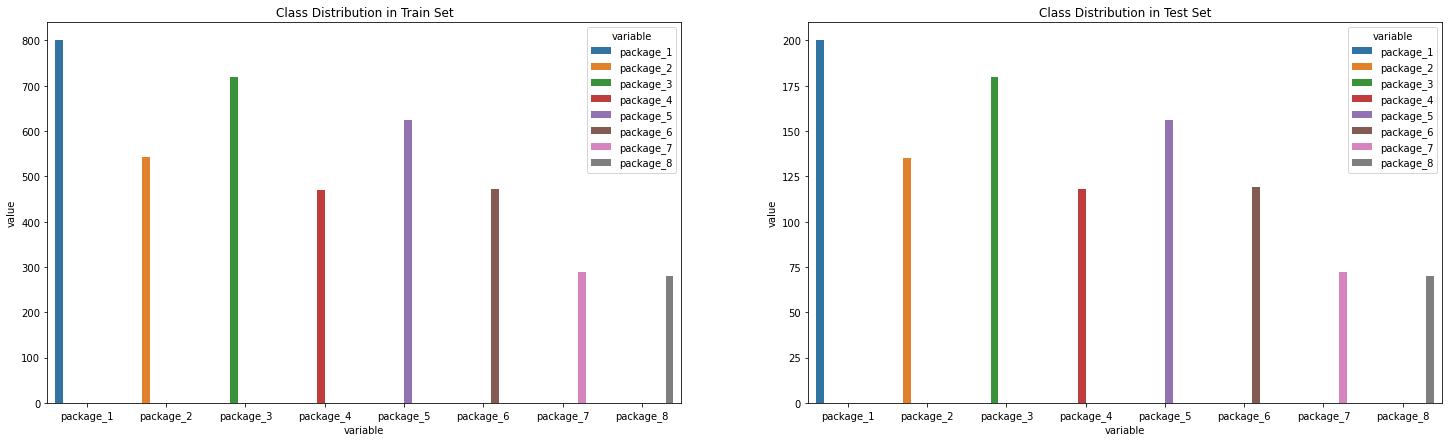

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(),
 x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')

# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(),
 x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Test Set')

# Neural Network

In [26]:
X_train = np.array(X_train)
X_test =  np.array( X_test)
y_train = np.array(y_train)
y_test =  np.array( y_test)

print(X_train)

class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())

test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())
print(train_dataset)

[[0.         0.75562701 0.47865436 ... 0.         0.         0.        ]
 [1.         0.38585209 0.43903195 ... 1.         0.         0.        ]
 [0.         0.14790997 0.46608534 ... 0.         0.         0.        ]
 ...
 [1.         0.54019293 0.44149499 ... 0.         0.         0.        ]
 [1.         0.30868167 0.47257672 ... 0.         0.         0.        ]
 [0.         0.33762058 0.5614294  ... 0.         0.         0.        ]]


In [27]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [28]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([0.0012, 0.0018, 0.0014, 0.0021, 0.0016, 0.0021, 0.0034, 0.0036])


In [29]:
target_list

tensor([4, 4, 2,  ..., 5, 0, 0])

In [30]:
class_count

[800, 542, 720, 470, 624, 473, 290, 281]

In [31]:
class_weights

tensor([0.0012, 0.0018, 0.0014, 0.0021, 0.0016, 0.0021, 0.0034, 0.0036])

In [32]:
# target_list = target_list.subtract(1)

In [33]:
class_weights_all = class_weights[target_list]

In [34]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

# Model Parameters

Before we proceed any further, let’s define a few parameters that we’ll use down the line.


In [35]:
EPOCHS =50
BATCH_SIZE = 20
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 8

# Dataloader Pytorch

In [36]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [37]:
# _, train = train_loader
# train

# Network Define

In [38]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 256)
        self.layer_3 = nn.Linear(256, 128)
        # self.layer_4 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(128, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.batchnorm3 = nn.BatchNorm1d(128)

        nn.init.xavier_uniform_(self.layer_1.weight)
        nn.init.zeros_(self.layer_1.bias)
        nn.init.xavier_uniform_(self.layer_2.weight)
        nn.init.zeros_(self.layer_2.bias)
        nn.init.xavier_uniform_(self.layer_out.weight)
        nn.init.zeros_(self.layer_out.bias)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        # x = self.layer_4(x)
        # x = self.relu(x)
        
        x = self.layer_out(x)
        
        return x

Check whether the GPU available

In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Loss functions and Optimizer

In [40]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay= 0.1)
print(model)


MulticlassClassification(
  (layer_1): Linear(in_features=68, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=128, bias=True)
  (layer_out): Linear(in_features=128, out_features=8, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [1]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [41]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [42]:
model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


# Train the Network

In [472]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [473]:
accuracy_stats = {
    'train': [],
    "test": []
}
loss_stats = {
    'train': [],
    "test": []
}

In [474]:
print("Begin training.")

for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad(set_to_none=False)
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step(closure=None)
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # TEST    
    with torch.no_grad():
        
        test_epoch_loss = 0
        test_epoch_acc = 0
        
        model.eval()
        for X_test_batch, y_test_batch in test_loader:
            X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
            
            y_test_pred = model(X_test_batch)
                        
            test_loss = criterion(y_test_pred, y_test_batch)
            test_acc = multi_acc(y_test_pred, y_test_batch)
            
            test_epoch_loss += test_loss.item()
            test_epoch_acc += test_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['test'].append(test_epoch_loss/len(test_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['test'].append(test_epoch_acc/len(test_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | test Loss: {test_epoch_loss/len(test_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| test Acc: {test_epoch_acc/len(test_loader):.3f}')

Begin training.


Epoch 001: | Train Loss: 2.05076 | test Loss: 1.80749 | Train Acc: 22.238| test Acc: 26.476
Epoch 002: | Train Loss: 1.82494 | test Loss: 1.81731 | Train Acc: 26.214| test Acc: 24.952
Epoch 003: | Train Loss: 1.76679 | test Loss: 1.76862 | Train Acc: 30.452| test Acc: 27.810
Epoch 004: | Train Loss: 1.75836 | test Loss: 1.72890 | Train Acc: 30.476| test Acc: 29.714
Epoch 005: | Train Loss: 1.75791 | test Loss: 1.76579 | Train Acc: 30.810| test Acc: 29.714
Epoch 006: | Train Loss: 1.78143 | test Loss: 1.77469 | Train Acc: 31.286| test Acc: 26.952
Epoch 007: | Train Loss: 1.79434 | test Loss: 1.85087 | Train Acc: 33.024| test Acc: 29.524
Epoch 008: | Train Loss: 1.82661 | test Loss: 1.82689 | Train Acc: 32.548| test Acc: 35.238
Epoch 009: | Train Loss: 1.83022 | test Loss: 1.81655 | Train Acc: 32.762| test Acc: 31.143
Epoch 010: | Train Loss: 1.85422 | test Loss: 1.85416 | Train Acc: 28.452| test Acc: 29.619
Epoch 011: | Train Loss: 1.87144 | test Loss: 1.87969 | Train Acc: 25.262| test 

In [475]:
accuracy_stats

{'train': [22.238095238095237,
  26.214285714285715,
  30.452380952380953,
  30.476190476190474,
  30.80952380952381,
  31.285714285714285,
  33.023809523809526,
  32.54761904761905,
  32.76190476190476,
  28.452380952380953,
  25.261904761904763,
  23.595238095238095,
  26.095238095238095,
  25.428571428571427,
  26.595238095238095,
  24.428571428571427,
  21.642857142857142,
  23.38095238095238,
  26.357142857142858,
  23.523809523809526,
  25.11904761904762,
  24.095238095238095,
  25.80952380952381,
  19.761904761904763,
  25.071428571428573,
  24.19047619047619,
  23.071428571428573,
  26.166666666666668,
  25.5,
  25.38095238095238,
  27.452380952380953,
  25.5,
  24.547619047619047,
  23.595238095238095,
  25.38095238095238,
  22.404761904761905,
  23.166666666666668,
  23.428571428571427,
  23.142857142857142,
  18.738095238095237,
  19.857142857142858,
  19.023809523809526,
  21.5,
  26.095238095238095,
  24.38095238095238,
  24.976190476190474,
  21.452380952380953,
  24.7857

In [476]:
loss_stats

{'train': [2.050763663791475,
  1.8249378079459782,
  1.7667862682115465,
  1.7583589849017915,
  1.7579119341714042,
  1.7814276451156252,
  1.7943356724012465,
  1.8266107837359111,
  1.8302221360660735,
  1.8542203432037716,
  1.8714400558244615,
  1.8699359263692583,
  1.8813841166950407,
  1.8897944541204543,
  1.88587680544172,
  1.8862875308309281,
  1.8786475317818778,
  1.8828935901323953,
  1.8825926462809244,
  1.9011711659885588,
  1.8841727103505816,
  1.8945779056776137,
  1.8775500649497623,
  1.8771110426811946,
  1.882637745993478,
  1.8825030173574175,
  1.8818715044430323,
  1.896814927600679,
  1.87851612113771,
  1.8844236373901366,
  1.8927679362751189,
  1.8848816814876739,
  1.8883945362908499,
  1.8913231798580714,
  1.8960612938517616,
  1.8856874244553703,
  1.890173740046365,
  1.8816466916175116,
  1.9016232252120973,
  1.8897403700011117,
  1.8873711841447012,
  1.8834053845632643,
  1.8907306052389599,
  1.8908131395067487,
  1.8910794944990248,
  1.88469

Text(0.5, 1.0, 'Train-Test Loss/Epoch')

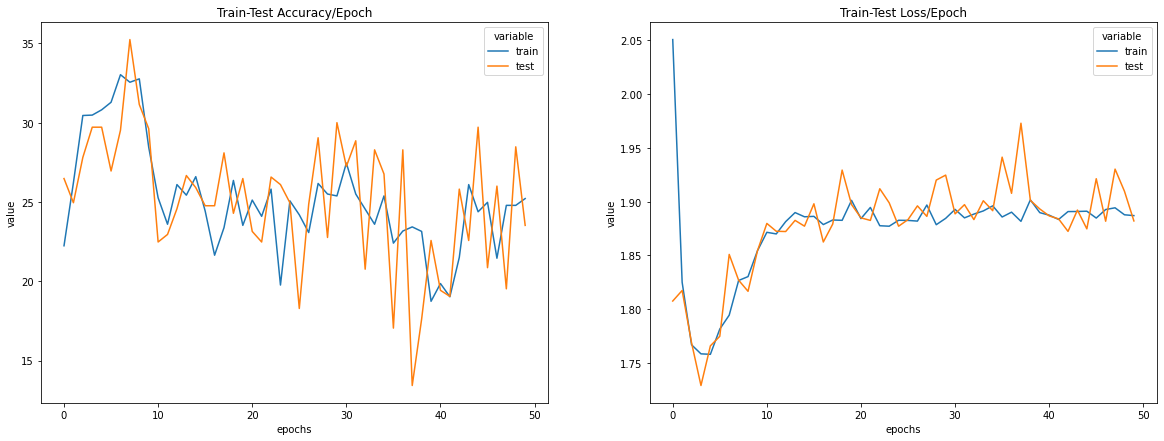

In [477]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Test Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Test Loss/Epoch')

In [478]:
len(test_loader)

1050

In [479]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
        y_pred_list = [np.array(a).squeeze().tolist() for a in y_pred_list]

# Confusion Matrix

<AxesSubplot:>

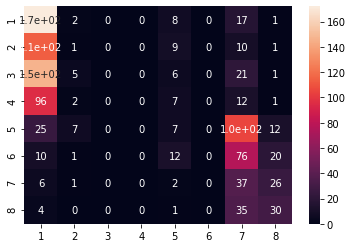

In [480]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list)).rename(columns=idx2class, index=idx2class)
sns.heatmap(confusion_matrix_df, annot=True)

# Classification Report

Finally, we print out the classification report which contains the precision, recall, and the F1 score.

In [481]:
from sklearn.metrics import f1_score

In [482]:
f1 = f1_score(y_test, y_pred_list,average = 'macro')
f1

0.135914664039664

In [483]:
print(classification_report(y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.30      0.86      0.44       200
           1       0.05      0.01      0.01       135
           2       0.00      0.00      0.00       180
           3       0.00      0.00      0.00       118
           4       0.13      0.04      0.07       156
           5       0.00      0.00      0.00       119
           6       0.12      0.51      0.19        72
           7       0.33      0.43      0.37        70

    accuracy                           0.24      1050
   macro avg       0.12      0.23      0.14      1050
weighted avg       0.11      0.24      0.13      1050



C:\Users\dewth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dewth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dewth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [484]:
submission_data = df_test.to_numpy()

In [485]:
df_test.describe()

,gender,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,...,district_name_Trincomalee,district_name_Unknown,district_name_Vavuniya,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_<20,age_group_>70
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.284667,0.287257,0.443602,0.073190,0.022379,0.043179,0.062771,0.827237,0.037996,0.007298,...,0.010444,0.002444,0.005778,0.174222,0.357778,0.240444,0.132667,0.063333,0.004889,0.026667
std,0.451306,0.232233,0.046472,0.092358,0.050890,0.053094,0.077055,0.324029,0.045574,0.038480,...,0.101674,0.049386,0.075800,0.379343,0.479400,0.427401,0.339252,0.243589,0.069757,0.161125
min,0.000000,0.000000,0.285487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.063505,0.409435,0.011454,0.000000,0.011661,0.011717,0.866667,0.010926,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.250804,0.434557,0.044958,0.000923,0.030644,0.040239,1.000000,0.027981,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.472669,0.463243,0.101641,0.019295,0.055639,0.086893,1.000000,0.049638,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.826269,1.000000,0.894560,1.000000,0.816466,1.000000,1.000000,0.791293,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [486]:
submission_data

array([[0.        , 0.00321543, 0.39849177, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01286174, 0.40212049, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05466238, 0.42637066, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.31511254, 0.44686436, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.20578778, 0.5651389 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.414791  , 0.43581992, ..., 0.        , 0.        ,
        0.        ]])

In [487]:
sub_data = (torch.from_numpy(submission_data).float())
sub_data

tensor([[0.0000, 0.0032, 0.3985,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0129, 0.4021,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0547, 0.4264,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [1.0000, 0.3151, 0.4469,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2058, 0.5651,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4148, 0.4358,  ..., 0.0000, 0.0000, 0.0000]])

In [488]:
subloader = DataLoader(dataset=sub_data, batch_size=1)
len(subloader)

4500

In [489]:
y_pred_sub_list = []
i = 0
with torch.no_grad():
    model.eval()
    for X_batch in subloader:
        i += 1
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        print(y_pred_tags)
        y_pred_sub_list.append(y_pred_tags.cpu().numpy())
        # y_pred_sub_list = [np.array(a).squeeze().tolist() for a in y_pred_list]
print(i)

tensor([0])
tensor([0])
tensor([1])
tensor([0])
tensor([6])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([1])
tensor([6])
tensor([6])
tensor([4])
tensor([0])
tensor([6])
tensor([0])
tensor([6])
tensor([7])
tensor([0])
tensor([6])
tensor([6])
tensor([0])
tensor([0])
tensor([0])
tensor([6])
tensor([6])
tensor([0])
tensor([6])
tensor([0])
tensor([0])
tensor([0])
tensor([4])
tensor([6])
tensor([0])
tensor([6])
tensor([0])
tensor([0])
tensor([7])
tensor([6])
tensor([0])
tensor([6])
tensor([0])
tensor([6])
tensor([6])
tensor([1])
tensor([0])
tensor([0])
tensor([6])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([6])
tensor([0])
tensor([7])
tensor([0])
tensor([0])
tensor([0])
tensor([6])
tensor([0])
tensor([0])
tensor([7])
tensor([0])
tensor([0])
tensor([6])
tensor([0])
tensor([7])
tensor([0])
tensor([6])
tensor([0])
tensor([1])
tensor([6])
tensor([0])
tensor([1])
tensor([0])
tensor([0])
tensor([6])
tens

In [490]:
y_sub = pd.DataFrame(y_pred_sub_list,columns=["next_month_plan"])
y_sub.shape

(4500, 1)

In [491]:
y_sub = y_sub.add(1)

In [492]:
y_sub.shape

(4500, 1)

In [493]:
y_sub.next_month_plan.value_counts()/4500

1    0.626667
7    0.243778
8    0.055556
5    0.046222
2    0.027778
Name: next_month_plan, dtype: float64

In [494]:
y_sub.index = ids
y_sub

,next_month_plan
primary_identifier,
2003793,1
1776101,1
6945050,2
2472049,1
7197266,7
...,...
8830679,8
3839728,1
2166141,1


In [495]:
y_sub.to_csv(f"Data\sub_nn_{f1}.csv")